# Excercise 1.  Plotting a function

## Task 1:

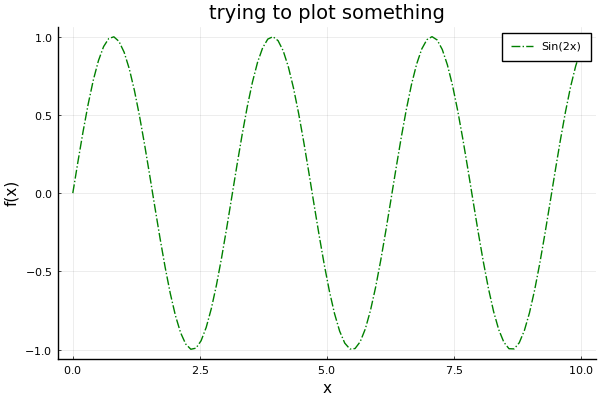

In [67]:
using Plots
pyplot()  # Now we're using the pyplot backend
x = LinRange(0, 10, 100) 
plot(x,map(x->sin(2x),x), label = "Sin(2x)", width = 1, color = "green", linestyle = :dashdot)
plot!(title = "trying to plot something", xlabel = "x", ylabel = "f(x)") #was machen die !-Zeichen

## Task 2:

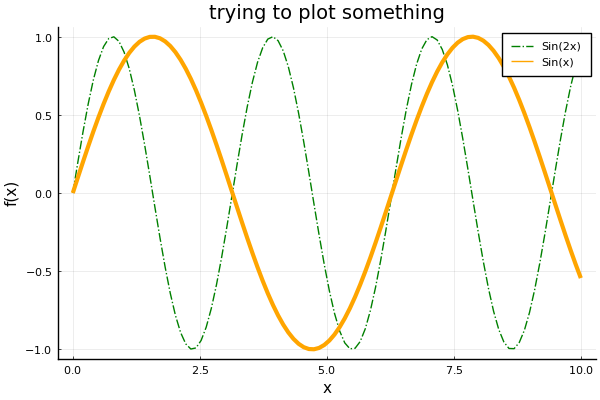

In [68]:
plot!(x,map(x->sin(x),x), label = "Sin(x)", width = 3, color = "orange")

# Exercise 2. Data Fitting

## Task 1:

In [40]:

using(LsqFit)

@. model(x,p) = p[1]*x/p[2]*exp(-(x/p[2])^p[3])
xdata = [ 15.2; 19.9;  2.2; 11.8; 12.1; 18.1; 11.8; 13.4; 11.5;  0.5; 18.0; 10.2; 10.6; 13.8;  4.6;  3.8; 15.1; 15.1; 11.7;  4.2 ]
ydata = [ 0.73; 0.19; 1.54; 2.08; 0.84; 0.42; 1.77; 0.86; 1.95; 0.27; 0.39; 1.39; 1.25; 0.76; 1.99; 1.53; 0.86; 0.52; 1.54; 1.05 ]
p0 = [0.5,0.5,0.5]
lb = [-Inf,0,-Inf]

fit = curve_fit(model, xdata, ydata, p0, lower = lb)

println("ceofficients = $(coef(fit))")

sigma = stderror(fit)
# to get margin of error and confidence interval of each parameter at 5% significance level:
margin_of_error = margin_error(fit, 0.05)
confidence_inter = confidence_interval(fit, 0.05)

println("std. error = $(sigma)")
println("error margin = $(margin_of_error)")
println("confidence_inter = $(confidence_inter)")


ceofficients = [4.748982067242579, 9.831266329629333, 1.8938402910682985]
std. error = [0.45164713858401184, 1.31131387782652, 0.4789846449281711]
error margin = [0.9528921686683909, 2.7666304468674063, 1.0105692654124152]
confidence_inter = [(3.7960898985741887, 5.70187423591097), (7.064635882761927, 12.59789677649674), (0.8832710256558833, 2.9044095564807137)]


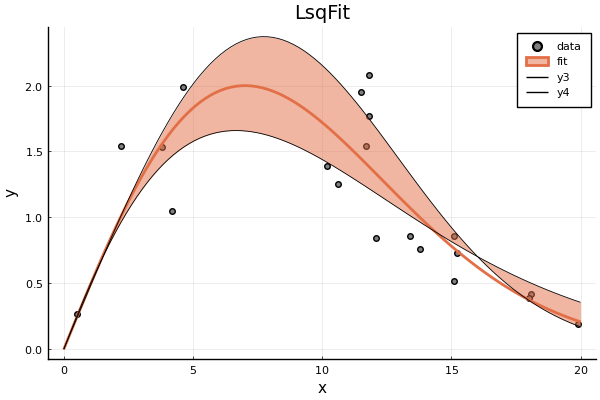

In [50]:
using Plots
pyplot()
scatter(xdata,ydata, label = "data",color = "grey")
x = LinRange(0,20,100)
plot!(x,model(x,coef(fit)), label="fit",width = 2, ribbon = (model(x,coef(fit)).-model(x, coef(fit) .- sigma), model(x, coef(fit) .+ sigma).-model(x,coef(fit))))
plot!(x,model(x, coef(fit) .- sigma),color = "black", width = 0.6) 
plot!(x, model(x, coef(fit).+ sigma), color = "black", width = 0.6)
plot!(title = "LsqFit", xlabel = "x",ylabel = "y")



# Exercise 3: Determinant Value and Ill-Conditioning

## Task 1:

In [29]:
using LinearAlgebra

function matgen(n,c) 
    #creating two random orthogonal matrcies U and V
    A = [rand(Int8) for i=1:n, j=1:n]
    U, R = qr(A)
    #println("Matrix Q = ")
    #show(stdout, "text/plain", Q)
    B = [rand(Int8) for i=1:n, j=1:n]
    V, R = qr(B)
    
    #creating a diagonal matrix sigma with values between 1 and 1/c
    step = abs(1-1/c)/(n-1)
    if c >= 1 
        x = [1/c:step:1;]
    end
    if c < 1 
        x = [1:step:1/c;]
    end
    sigma = Diagonal(x)
    
    #creating the output matrix m = U*sigma*V
    return U*sigma*V
    
end

M = matgen(3,3)

3×3 Matrix{Float64}:
  0.629971  0.145645  -0.393674
 -0.113606  0.522903  -0.0868653
 -0.238913  0.470355   0.640553

In [32]:
#now we want to test if sigma are the sigular values of M and if c is really the condition number
S, V, D = svd(M)
println(V)
N = inv(M)
opnorm(M,2)*opnorm(N,2)
#it works


[0.9999999999999997, 0.6666666666666672, 0.3333333333333334]


2.999999999999999